# A Neural Network That Can Read Handwriting

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

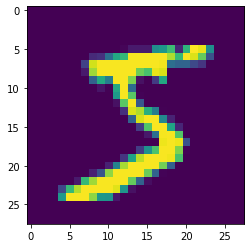

In [9]:
plt.imshow(x_train[0])

# Normalizing the Train and Test Data

In [10]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Layers Of Neural Network

In [13]:
model=tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [15]:
model.add(tf.keras.layers.Dense(128,activation='relu'))

In [16]:
model.add(tf.keras.layers.Dense(128,activation='relu'))

In [17]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training Of Neural Network

In [19]:
m=model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2558 - accuracy: 0.9257
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1068 - accuracy: 0.9664
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0721 - accuracy: 0.9770
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0530 - accuracy: 0.9827
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0396 - accuracy: 0.9872
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9891
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0209 - accuracy: 0.9927
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0179 - accuracy: 0.9936
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.014

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.save("handwritten.model")

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [22]:
model=tf.keras.models.load_model('handwritten.model')

In [23]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_predict=y_prob.argmax(axis=1)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_predict)

0.9752

In [28]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1292 - accuracy: 0.9752


In [29]:
print(loss)

0.12923549115657806


In [30]:
print(accuracy)

0.9751999974250793


# Prediction 

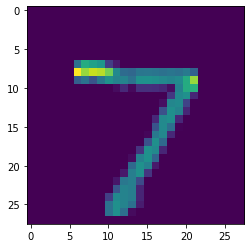

In [31]:
plt.imshow(x_test[0])

In [32]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 40ms/step


array([7], dtype=int64)